### Problem

60 subjects were randomly assigned 1 of 4 diets and their weightloss was recorded after 6 weeks. What is the relationship between these diets and weightloss? 

### IMPORT LIBRARIES & DATA

In [1]:
#One-way ANOVA using Scipy Lib
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
#open .txt file w/ tab delimited
df = pd.read_table('DietWeightLoss.txt')

**Explore dataset**

In [3]:
df.head()

,WeightLoss,Diet
0,9.9,A
1,9.6,A
2,8.0,A
3,4.9,A
4,10.2,A


Descriptive Statistics of each diet group

In [4]:
#Group by diet type labeled in 'Diet' column
diet_grp  = df.groupby(['Diet'])

#Calculate mean & median for each diet typ
diet_grp['WeightLoss'].agg(['mean','median'])

,mean,median
Diet,,
A,9.180000,9.6
B,8.906667,9.2
C,12.113333,12.2
D,10.540000,10.5


In [5]:
#Basic descriptive stats
diet_grp.describe()

WeightLoss                                                    
          count       mean       std  min    25%   50%    75%   max
Diet                                                               
A          15.0   9.180000  2.295710  4.9   8.15   9.6  10.50  12.9
B          15.0   8.906667  2.781949  3.8   7.85   9.2  10.75  12.7
C          15.0  12.113333  1.793586  8.7  10.80  12.2  13.00  15.1
D          15.0  10.540000  2.233127  5.8   9.50  10.5  11.80  13.7

Visualize the distribution for each diet type with boxplot comparing weightloss to diet type

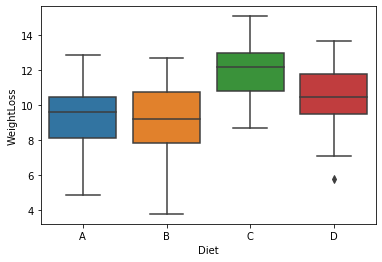

In [6]:
plt = sns.boxplot(x='Diet', y='WeightLoss', data=df)


**Interpretation:** We can see potentially at least one group is significantly different from the others. We will use one-way analysis of variance to test this hypothesis.

Conduct ANOVA to understand if at least one of the diets significantly differs.

>Ho: There is no difference in mean weightloss between diets A, B, C, D<br>
>Ha: At least one diet differs

In [47]:
#Define Grouped dfs (for readability when passed as arguments in f_oneway)
a = diet_grp.get_group('A')
b = diet_grp.get_group('B')
c = diet_grp.get_group('C')
d = diet_grp.get_group('D')

#Calculate F_stat & P_value using scipy f_oneway
f_stat, p_value = stats.f_oneway(a['WeightLoss'], b['WeightLoss'], c['WeightLoss'], d['WeightLoss'])

print(f'f-stat: {f_stat:.4f}\np-value: {p_value:.6f}')

f-stat: 6.1175
p-value: 0.001128


**Interpretation**: If there was no difference between means, we'd expect the ratio of the variability that's occuring between groups (explained) and that which is occuring within groups (unexplained) to be close to 1. This F-Stat of 6 with a p_value well below the alpha threshold of 5% suggests that at least one mean significantly differs between groups. Therefore we reject the Null Hypothesis as not all means are equal

### Comparing Pair-Wise Means for group differences

Possible pairs:
$ 4\choose 2 $ = 6 possible combinations<br>
   * AB, AC, AD, BC, BD, CD
   
Tukeyhsd method assumes overall alpha=.05 & corrects alpha on a per pair-wise basis to account for increase in rate of TypeI error rate as the number of comparisions increases

In [8]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

#Setup data for comparison
MultiComp = MultiComparison(df['WeightLoss'], df['Diet'])

#Show all pair-wise means comparison
MultiComp.tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-0.2733,0.9,-2.5,1.9534,False
A,C,2.9333,0.0051,0.7066,5.16,True
A,D,1.36,0.3783,-0.8667,3.5867,False
B,C,3.2067,0.0019,0.98,5.4334,True
B,D,1.6333,0.2226,-0.5934,3.86,False
C,D,-1.5733,0.2522,-3.8,0.6534,False


*Statsmodels notes on interpretation of plot:*

Multiple comparison tests are nice, but lack a good way to be visualized. If you have, say, 6 groups, showing a graph of the means between each group will require 15 confidence intervals. Instead, we can visualize inter-group differences with a single interval for each group mean. Hochberg et al. [1] first proposed this idea and used Tukey’s Q critical value to compute the interval widths. Unlike plotting the differences in the means and their respective confidence intervals, any two pairs can be compared for significance by looking for overlap.

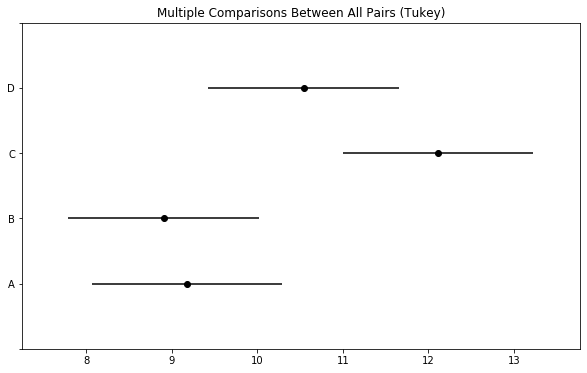

In [91]:
#Plot multiple comparison of means
MultiComp.tukeyhsd().plot_simultaneous().get_axes()

*This dataset was provided by Marine Stats Lecture 